#For this project we are going to analyze cab trips in the Chicago metro area.  The data provides us with insights into which neighborhoods and companies are most popular among the people of Chicago for their cab trips.  We can also see how long trips are between neighboors depending on weather conditions and the time of the day it is.

In [9]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

project_1 = pd.read_csv('/datasets/project_sql_result_01.csv')
project_4 = pd.read_csv('/datasets/project_sql_result_04.csv')

print(project_1)
print(project_1.dtypes)
print()
print(project_4)
print(project_4.dtypes)
print()
duplicates_1 = project_1.duplicated().sum()
duplicates_4 = project_4.duplicated().sum()

print(duplicates_1)
print(duplicates_4)

                       company_name  trips_amount
0                         Flash Cab         19558
1         Taxi Affiliation Services         11422
2                 Medallion Leasing         10367
3                        Yellow Cab          9888
4   Taxi Affiliation Service Yellow          9299
..                              ...           ...
59     4053 - 40193 Adwar H. Nikola             7
60          2733 - 74600 Benny Jona             7
61    5874 - 73628 Sergey Cab Corp.             5
62       2241 - 44667 - Felman Corp             3
63      3556 - 36214 RC Andrews Cab             2

[64 rows x 2 columns]
company_name    object
trips_amount     int64
dtype: object

   dropoff_location_name  average_trips
0                   Loop   10727.466667
1            River North    9523.666667
2          Streeterville    6664.666667
3              West Loop    5163.666667
4                 O'Hare    2546.900000
..                   ...            ...
89       Mount Greenwood       3.137

In [3]:
# Reviewer's code

display(project_1.head(3))

project_1.tail(3)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367


,company_name,trips_amount
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3
63,3556 - 36214 RC Andrews Cab,2


#Read the files to a dataframe then checked for duplicates, printed the dataframes to get a visual then print the data types as well to see which type the columns are.

In [4]:
top_neighborhoods = project_4.sort_values(by='average_trips', ascending=False)
top_10_neighborhoods = top_neighborhoods.head(10)
print(top_10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


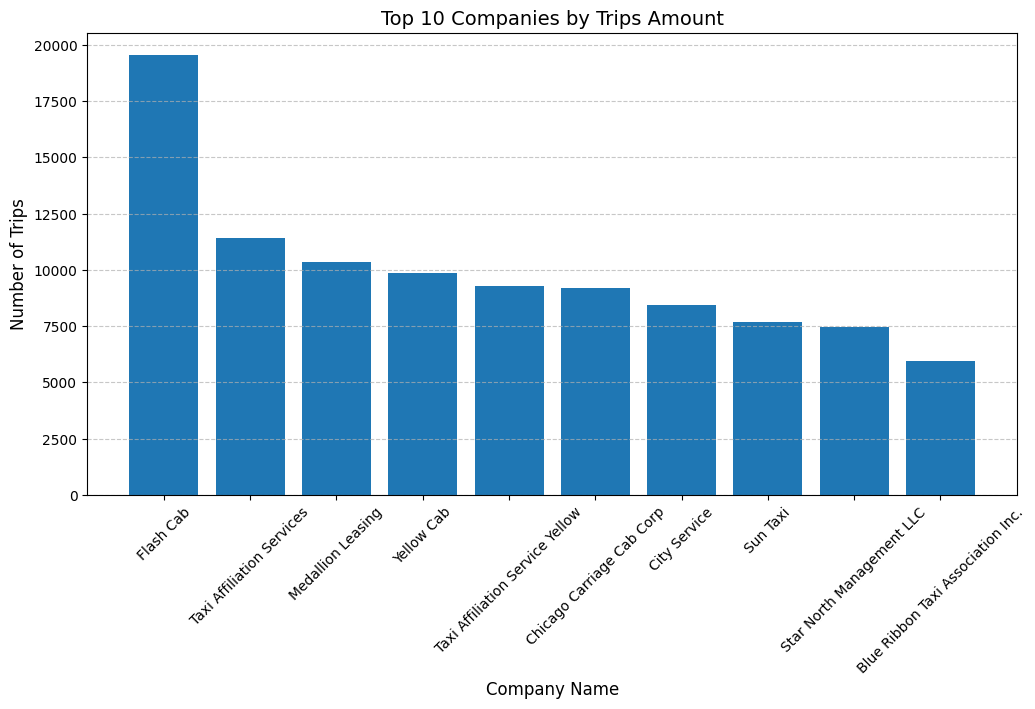

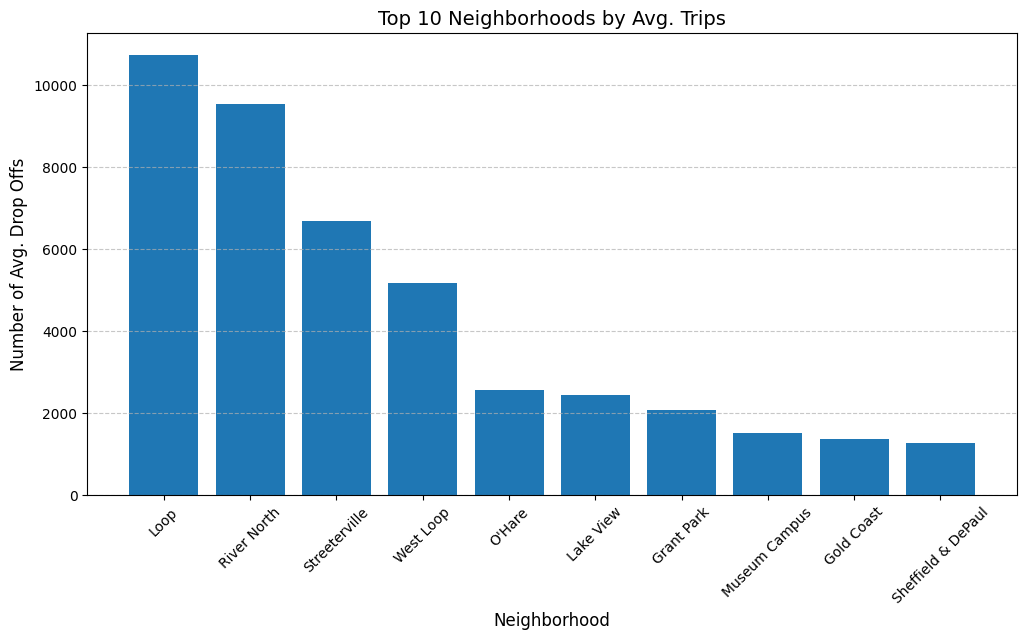

In [5]:
top_companies = project_1.sort_values(by='trips_amount', ascending=False)
top_10_companies = top_companies.head(10)

plt.figure(figsize=(12,6))
plt.bar(top_10_companies['company_name'], top_10_companies['trips_amount'])
plt.title('Top 10 Companies by Trips Amount', fontsize=14)
plt.xlabel('Company Name', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(top_10_neighborhoods['dropoff_location_name'], top_10_neighborhoods['average_trips'])
plt.title('Top 10 Neighborhoods by Avg. Trips', fontsize=14)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Number of Avg. Drop Offs', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Based off the company data Flash Cab is the predominant company when it comes to trips.  They have almost 20,000 trips while the next closest has less than 12,500.  From there it is a slight fall for each company but they are a lot closer in total trips.  For the neighboorhoods the 4 main drop offs are the Loop, River North, Streeterville and West Loop.  There is a huge gap between the 4th spot West Loop and the 5th spot o'Hare, West Loop averages more than double the drop offs.  

In [6]:
project_7 = pd.read_csv('/datasets/project_sql_result_07.csv')
print(project_7)
print()
print(project_7.dtypes)

                 start_ts weather_conditions  duration_seconds
0     2017-11-25 16:00:00               Good            2410.0
1     2017-11-25 14:00:00               Good            1920.0
2     2017-11-25 12:00:00               Good            1543.0
3     2017-11-04 10:00:00               Good            2512.0
4     2017-11-11 07:00:00               Good            1440.0
...                   ...                ...               ...
1063  2017-11-25 11:00:00               Good               0.0
1064  2017-11-11 10:00:00               Good            1318.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0
1067  2017-11-04 16:00:00                Bad            2834.0

[1068 rows x 3 columns]

start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object


In [8]:
good_weather = project_7[project_7['weather_conditions'] == 'Good']['duration_seconds']
bad_weather = project_7[project_7['weather_conditions'] == 'Bad']['duration_seconds']

t_stat, p_value_ttest = ttest_ind(good_weather, bad_weather, equal_var=False)

mean_good_weather = good_weather.mean()
mean_bad_weather = bad_weather.mean()

print("Mean Duration (Good Weather):", mean_good_weather)
print("Mean Duration (Bad Weather):", mean_bad_weather)
print("\nT-Test Results:")
print("T-Statistic:", t_stat)
print("P-Value (T-Test):", p_value_ttest)
print("Hypothesis: There is no significant difference in the average duration of ride lengths from the Loop to O'Hare on rainy and sunny days.")

alpha = 0.05
if p_value_ttest < alpha:
    print("\nReject the null hypothesis: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference in the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.")

Mean Duration (Good Weather): 1999.6756756756756
Mean Duration (Bad Weather): 2427.2055555555557

T-Test Results:
T-Statistic: -7.186034288068629
P-Value (T-Test): 6.738994326108734e-12
Hypothesis: There is a significant difference in the average duration of ride lengths from the Loop to O'Hare on rainy and sunny days.

Reject the null hypothesis: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.


#I formed the hypothesis from the question of whether or not there is a statistical difference in the duration of rides between days with rain and days without rain.  I used the weather conditions of good or bad and the average duration of the trips based off those columns.  Based off the data we reject the null hypothesis that there is no significant difference between ride lengths from the Loop to O'Hare between rainy and sunny days.

#Overall the project showed most trips are done in certain areas of Chicago, predominantly the area in downtown Chicago.  The data also showed one company had a predominant lead in trips compared to the rest.  The data also showed there is a difference in ride lengths depending on weather conditions, this is more than likely due to more traffic and slower movement due to bad conditions.